```
Question 1: What is Simple Linear Regression?
Answer: Simple Linear Regression is a statistical method that allows us to summarize and study
the relationship between two continuous variables: one independent variable (predictor) and one
 dependent variable (response). The goal is to find a linear equation that best describes the
 relationship between these variables, enabling us to predict the value of the dependent
 variable based on the value of the independent variable. This relationship is represented
by a straight line, hence the term "linear".
```

```
Question 2: What are the key assumptions of Simple Linear Regression?
Answer: The key assumptions of Simple Linear Regression are:
1.  **Linearity:** The relationship between the independent and dependent variables is linear.
2.  **Independence:** The observations are independent of each other.
3.  **Homoscedasticity:** The variance of the residuals is constant across all levels of the independent variable.
4.  **Normality:** The residuals are normally distributed.
```

```
Question 3: What is heteroscedasticity, and why is it important to address in regression
models?
Answer: Heteroscedasticity refers to the unequal variance of residuals
across the range of the independent variable. It's important to address
because it violates the assumption of homoscedasticity in linear regression, which can lead to biased standard errors, incorrect confidence
intervals, and unreliable hypothesis tests.
```
```
Question 4: What is Multiple Linear Regression?
Answer: Multiple Linear Regression is an extension of simple linear regression that involves two or more independent variables to predict a
single dependent variable. It seeks to find a linear equation that best
describes the relationship between multiple predictors and the response, allowing for more complex modeling of relationships.
```
```
Question 5: What is polynomial regression, and how does it differ from linear
regression?
Answer: Polynomial regression is a form of regression analysis in which the
 relationship between the independent variable and the dependent variable is modeled as an nth-degree polynomial. It differs from linear regression
  in that it can model non-linear relationships between variables by including polynomial terms (e.g., x^2, x^3) in the regression equation,
  while linear regression models only linear relationships (y = mx + c).
```

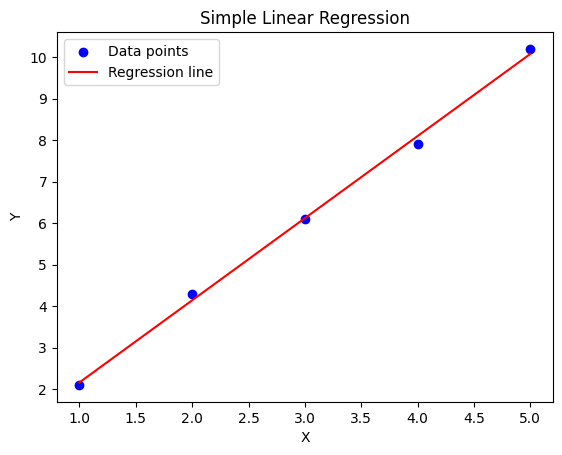

Coefficient (slope): 1.9800000000000004
Intercept: 0.17999999999999794


In [ ]:
#Question 6: Implement a Python program to fit a Simple Linear Regression model to
# the following sample data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
#Plot the regression line over the data points.
# (Include your Python code and output in the code box below.)
# Answer:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, Y)

# Predict the values for the regression line
y_pred = model.predict(X)

# Plot the data points and the regression line
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

# Print the model coefficients
print(f"Coefficient (slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

In [ ]:
# Question 7: Fit a Multiple Linear Regression model on this sample data:
# ● Area = [1200, 1500, 1800, 2000]
# ● Rooms = [2, 3, 3, 4]
# ● Price = [250000, 300000, 320000, 370000]
# Check for multicollinearity using VIF and report the results.

import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Sample data
data = {'Area': [1200, 1500, 1800, 2000],
        'Rooms': [2, 3, 3, 4],
        'Price': [250000, 300000, 320000, 370000]}

df = pd.DataFrame(data)

# Fit Multiple Linear Regression model using scikit-learn (for fitting)
X = df[['Area', 'Rooms']]
y = df['Price']

model = LinearRegression()
model.fit(X, y)

print("Multiple Linear Regression Model Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient for Area: {model.coef_[0]}")
print(f"Coefficient for Rooms: {model.coef_[1]}")

# Check for multicollinearity using VIF (using statsmodels for VIF calculation)
X_vif = sm.add_constant(X) # Add a constant for VIF calculation
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\nVariance Inflation Factor (VIF) for multicollinearity check:")
print(vif_data)

Multiple Linear Regression Model Coefficients:
Intercept: 103157.89473684214
Coefficient for Area: 63.15789473684211
Coefficient for Rooms: 34736.842105263146

Variance Inflation Factor (VIF) for multicollinearity check:
  feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


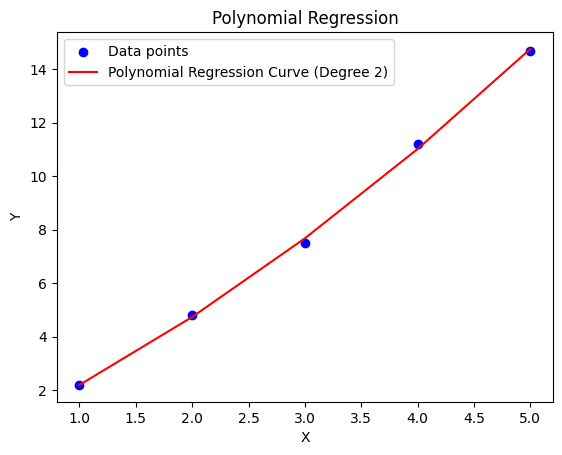

Coefficients (including intercept): [0.   1.94 0.2 ]
Intercept: 0.06000000000000938


In [ ]:
# Question 8: Implement polynomial regression on the following data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
# Fit a 2nd-degree polynomial and plot the resulting curve.
# Answer:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (2nd degree)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Create a linear regression model (which will fit the polynomial features)
model = LinearRegression()

# Fit the model to the polynomial features
model.fit(X_poly, Y)

# Predict the values for the polynomial regression curve
y_pred = model.predict(X_poly)

# Plot the data points and the polynomial regression curve
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Polynomial Regression Curve (Degree 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

# Print the model coefficients
print(f"Coefficients (including intercept): {model.coef_}")
print(f"Intercept: {model.intercept_}")

In [ ]:
#Question:9 Create a residuals plot for a regression model trained on this data:
# ● X = [10, 20, 30, 40, 50]
# ● Y = [15, 35, 40, 50, 65]
# Assess heteroscedasticity by examining the spread of residuals.

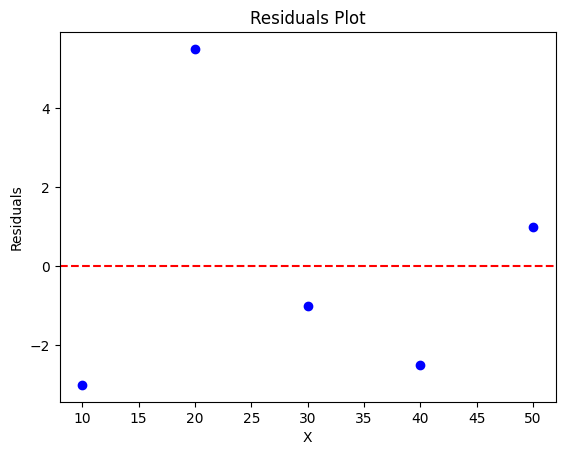

Assess heteroscedasticity by examining the spread of residuals in the plot.
If the residuals are randomly scattered around the horizontal line at 0 with no discernible pattern,
it suggests homoscedasticity (constant variance).
If the spread of residuals changes as X changes (e.g., widens or narrows),
it suggests heteroscedasticity (unequal variance).


In [ ]:
#Question:9 Create a residuals plot for a regression model trained on this data:
# ● X = [10, 20, 30, 40, 50]
# ● Y = [15, 35, 40, 50, 65]
# Assess heteroscedasticity by examining the spread of residuals.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X, Y)

# Predict the values
y_pred = model.predict(X)

# Calculate the residuals
residuals = Y - y_pred

# Create the residuals plot
plt.scatter(X, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--') # Add a horizontal line at y=0
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Assess heteroscedasticity
print("Assess heteroscedasticity by examining the spread of residuals in the plot.")
print("If the residuals are randomly scattered around the horizontal line at 0 with no discernible pattern,")
print("it suggests homoscedasticity (constant variance).")
print("If the spread of residuals changes as X changes (e.g., widens or narrows),")
print("it suggests heteroscedasticity (unequal variance).")

```
Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.
Answer: As a data scientist facing heteroscedasticity and multicollinearity in a real estate price prediction model, I would take the following steps to address these issues and ensure a robust model:

**Addressing Heteroscedasticity:**

1.  **Visualize Residuals:** Create a residuals plot (as done in Question 9) to visually inspect for patterns that indicate unequal variance.
2.  **Transform the Dependent Variable:** Apply transformations to the dependent variable (house price), such as taking the logarithm or square root. This can help stabilize the variance of the residuals.
3.  **Use Weighted Least Squares (WLS):** If the pattern of heteroscedasticity is known, WLS can be used to give less weight to observations with higher variance.
4.  **Use Robust Standard Errors:** Calculate robust standard errors (also known as White standard errors) which are not affected by heteroscedasticity. This doesn't fix the inefficiency of the OLS estimator but provides correct standard errors for hypothesis testing and confidence intervals.

**Addressing Multicollinearity:**

1.  **Calculate Variance Inflation Factor (VIF):** Compute VIF for each independent variable (as done in Question 7). High VIF values (typically above 5 or 10) indicate significant multicollinearity.
2.  **Remove Highly Correlated Predictors:** If two or more independent variables are highly correlated, consider removing one of them from the model. Domain knowledge is crucial here to decide which variable to keep. For example, if "Area" and "Number of Rooms" are highly correlated, I might choose to keep "Area" if it's considered a more important predictor of price.
3.  **Combine Correlated Predictors:** Create a new variable that combines the information from highly correlated predictors. For example, a "density" feature could be created from "Area" and "Number of Rooms".
4.  **Use Regularization Techniques:** Techniques like Ridge Regression or Lasso Regression can help mitigate multicollinearity by adding a penalty term to the cost function, which shrinks the coefficients of correlated variables.
5.  **Principal Component Analysis (PCA):** PCA can be used to create a new set of uncorrelated features (principal components) from the original correlated features. These principal components can then be used in the regression model.

**Ensuring a Robust Model:**

*   **Cross-Validation:** Use cross-validation techniques to assess the model's performance on unseen data and ensure it generalizes well.
*   **Domain Expertise:** Collaborate with real estate experts to understand the relationships between features and house prices, which can help in selecting relevant features and interpreting model results.
*   **Feature Engineering:** Create new features that might better capture the underlying relationships and reduce multicollinearity.
*   **Model Evaluation Metrics:** Use appropriate evaluation metrics (e.g., R-squared, Mean Absolute Error, Root Mean Squared Error) to assess the model's accuracy and compare different models.
*   **Iterative Process:** Model building is an iterative process. Continuously evaluate the model, identify issues, and apply appropriate techniques to improve its performance and robustness.
```